# 1. Load the dataset.

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

In [2]:
pd_df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data") # Reading dataset
pd_df.sample(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
161,phon_R01_S39_3,115.322,135.738,107.802,0.00619,0.00005,0.00352,0.00329,0.01057,0.03273,...,0.04933,0.02810,19.388,1,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
75,phon_R01_S19_4,110.707,122.611,105.007,0.00516,0.00005,0.00277,0.00289,0.00831,0.02215,...,0.03851,0.00472,25.197,1,0.463514,0.807217,-5.477592,0.315074,1.862092,0.228624
136,phon_R01_S33_3,113.400,133.344,107.816,0.00451,0.00004,0.00219,0.00283,0.00658,0.04879,...,0.07154,0.02278,19.013,1,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
139,phon_R01_S33_6,116.150,131.731,109.815,0.00381,0.00003,0.00181,0.00232,0.00542,0.03026,...,0.04543,0.01827,18.801,1,0.624811,0.696049,-5.866357,0.233070,2.445646,0.184985
167,phon_R01_S42_3,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,...,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
176,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429


# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.(2.5 points)

In [3]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Inferences:-
### 1.We have 23 attributes and have passable amount of data(i.e. about 195 entries) for modelling.
### 2. We have 22 independent variables and 1 dependent variables/target attribute(i.e. status).
### 3.Except name attribute all the other attribute columns are having data type as float64 or int64.(Name attribute not needed in modelling).

In [4]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(pd_df)

Your selected dataframe has 24 columns and 195 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### Inference:-  No missing values in data set.

In [5]:
pd_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
pd_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

### Inference:- There are 147 people affected with PD of the 195.

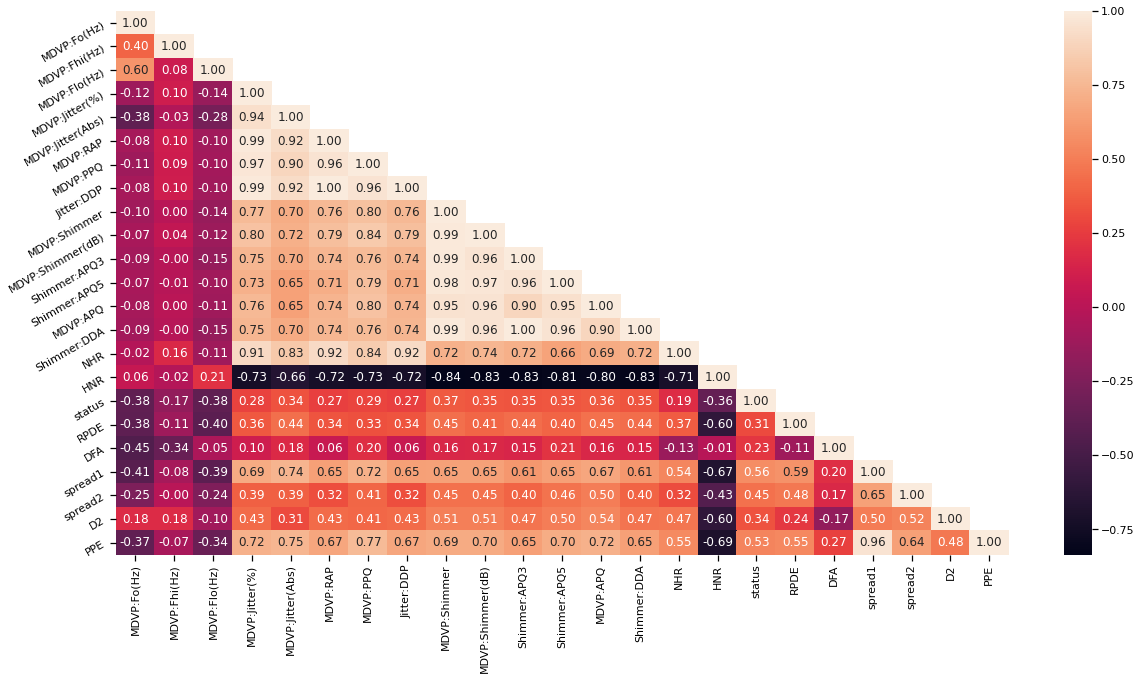

In [7]:
corr = pd_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(20,10))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True #Return the indices for the upper-triangle of arr.
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Inferences:-
### 1.MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP & NHR.As they are several measures of variation in fundamental frequency except NHR seems to be the possible reason for high correlation.
### 2.MDVP:Shimmer has a very high correlation with MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA. As they are several measures of variation in amplitude seems to be the possible reason for high correlation.
### 3.The target variable "status" seems to have low positive corelation with spread1, spread2 and PPE.

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points).

### Univariate analysis:-

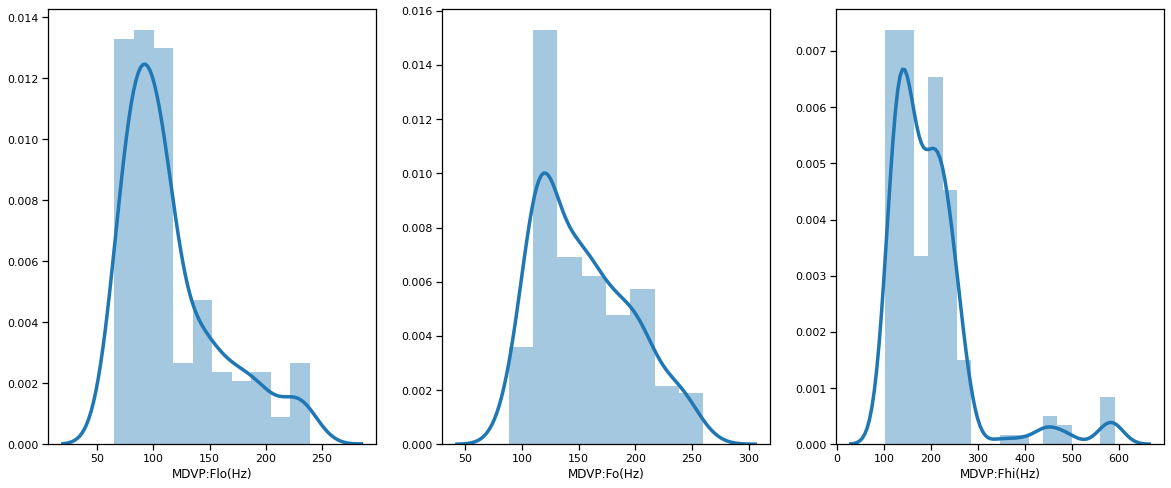

In [8]:
fig, ax = plt.subplots(1,3,figsize=(20,8)) 
sns.distplot(pd_df['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(pd_df['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(pd_df['MDVP:Fhi(Hz)'],ax=ax[2])

## Inferences:-
### 1.Minimum vocal fundamental frequency is bit positively skewed while having high values in the range of 75Hz and 125Hz.
### 2.Average vocal fundamental frequency is almost normally distributed with more values in the range of 120Hz and 130Hz.
### 3.Maximum vocal fundamental frequency has some values at the right tail.

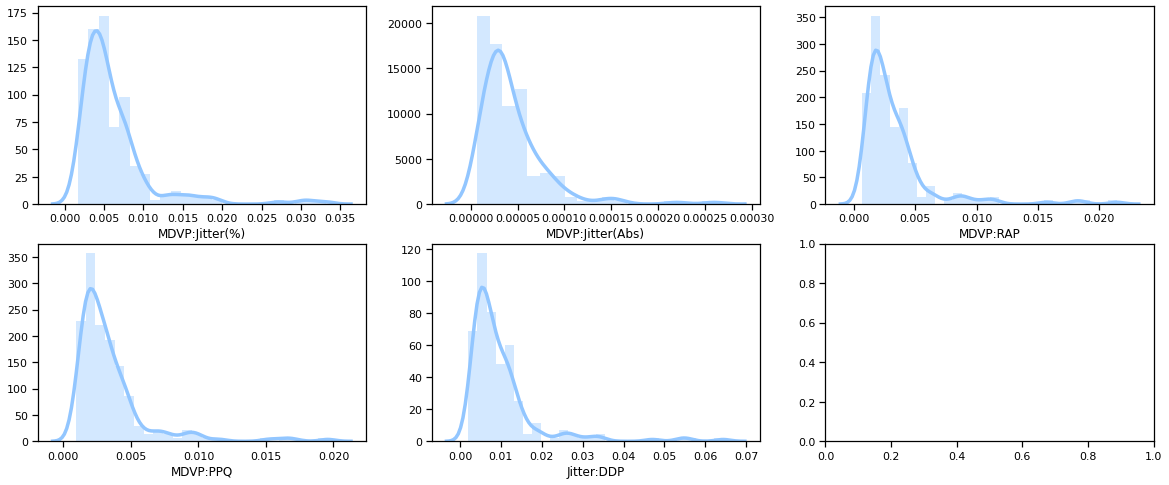

In [9]:
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(2,3,figsize=(20,8)) 
sns.distplot(pd_df['MDVP:Jitter(%)'],ax=ax[0,0]) 
sns.distplot(pd_df['MDVP:Jitter(Abs)'],ax=ax[0,1]) 
sns.distplot(pd_df['MDVP:RAP'],ax=ax[0,2]) 
sns.distplot(pd_df['MDVP:PPQ'],ax=ax[1,0]) 
sns.distplot(pd_df['Jitter:DDP'],ax=ax[1,1]) 

### Inferences:- All the graphs are positivley skewed.

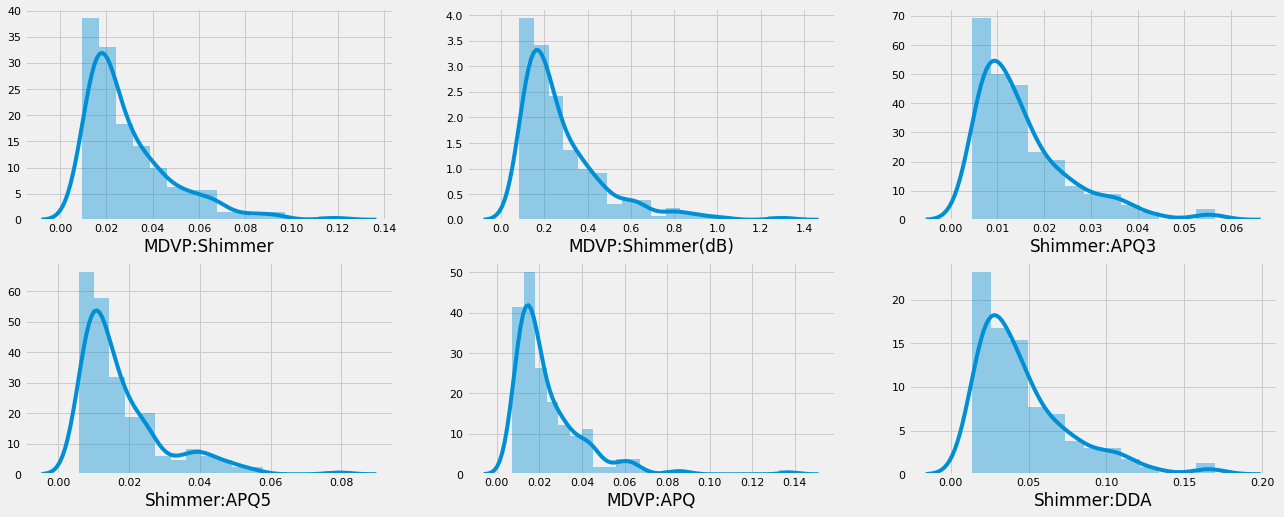

In [10]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2,3,figsize=(20,8)) 
sns.distplot(pd_df['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(pd_df['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(pd_df['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(pd_df['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(pd_df['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(pd_df['Shimmer:DDA'],ax=ax[1,2])

### Inferences:- All the graphs are positivley skewed.

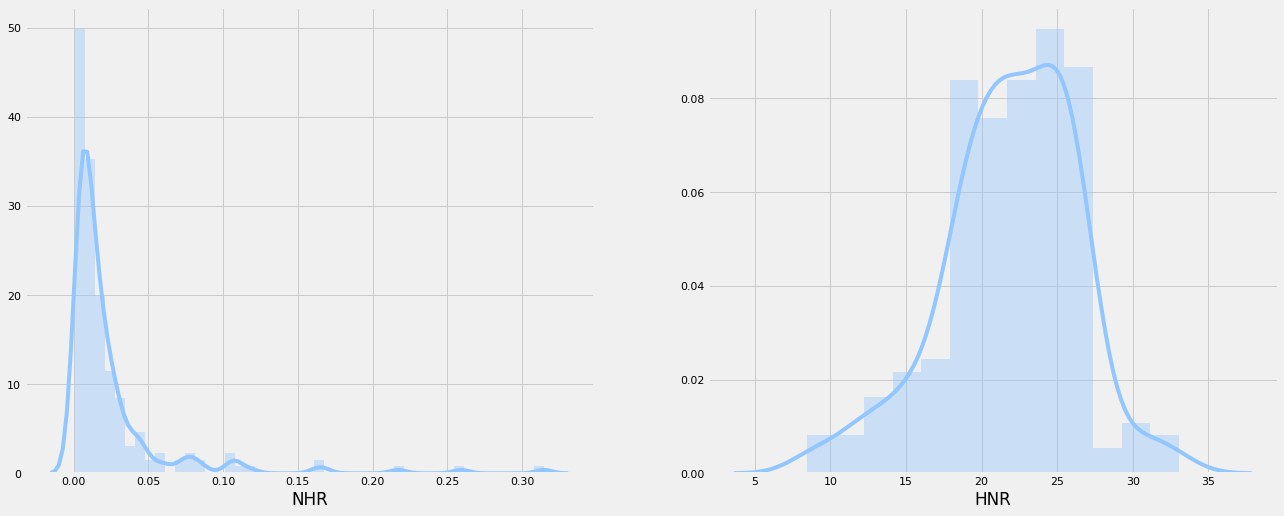

In [11]:
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(1,2,figsize=(20,8)) 
sns.distplot(pd_df['NHR'],ax=ax[0]) 
sns.distplot(pd_df['HNR'],ax=ax[1])

## Inferences:-
### 1.NHR is right skewed and are having high values between range of 0.00 & 0.03.
### 2.HNR is normally distributed but shows slight negative skewness upon closer look.

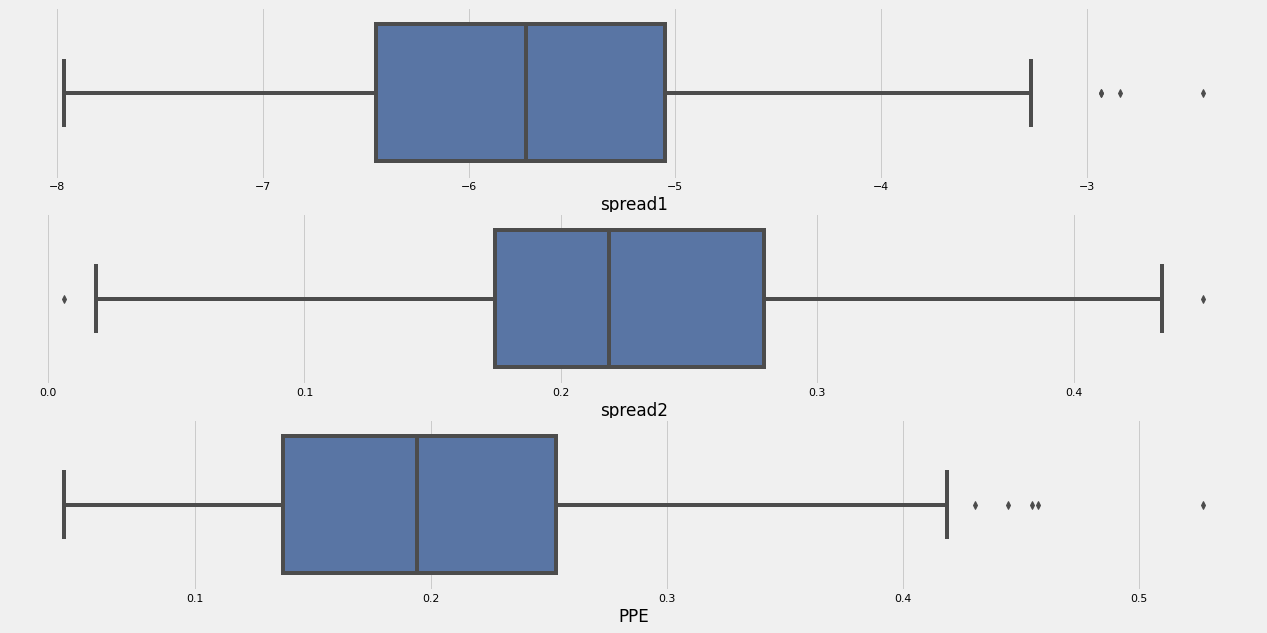

In [12]:
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(3,1,figsize=(20,10)) 
sns.boxplot(x='spread1',data=pd_df, ax=ax[0]) 
sns.boxplot(x='spread2',data=pd_df, ax=ax[1])
sns.boxplot(x='PPE',data=pd_df,ax=ax[2])

## Inferences:-
### 1.All the 3 have outliers.
### 2. Spread1 and PPE seems to be symmetric while spread2 is right skewed.

### Bivariate analysis:-

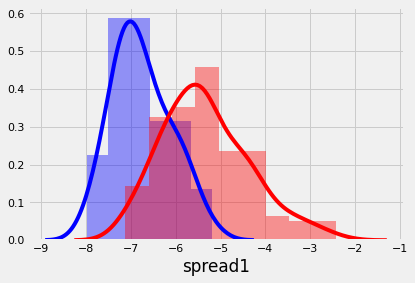

In [13]:
sns.distplot( pd_df[pd_df.status == 0]['spread1'], color = 'b')
sns.distplot( pd_df[pd_df.status == 1]['spread1'], color = 'r')

### Inferences:- Spread1 of normal people and people having PD is normally distributed. There seems to be a distinctive difference between spread1 of normal people and people with PD but not between the range of -7.2 and -5.2.

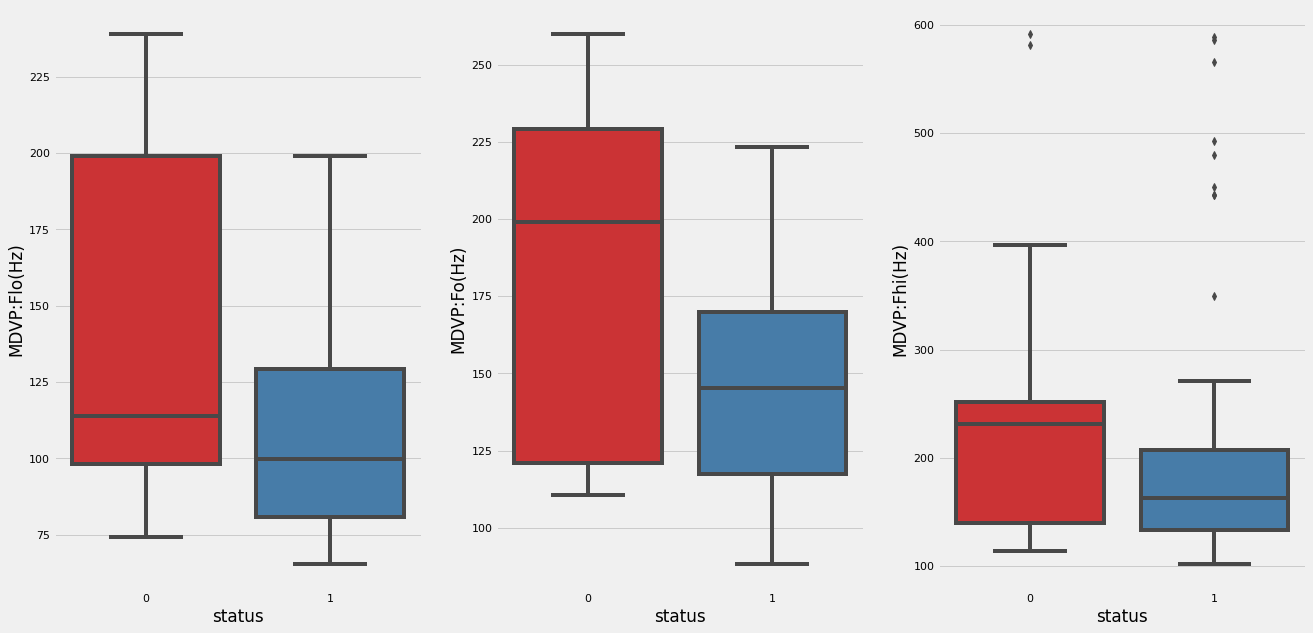

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=pd_df,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=pd_df,palette="Set1",ax=ax[1])
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=pd_df,palette="Set1",ax=ax[2]) 

## Inferences:-
### 1.People having PD have lower Minimum & Maximum vocal fundamental frequency compared to normal people.
### 2.Maximum vocal fundamental frequency for normal and people with PD has outliers but people with PD have more number of outliers comparatively.

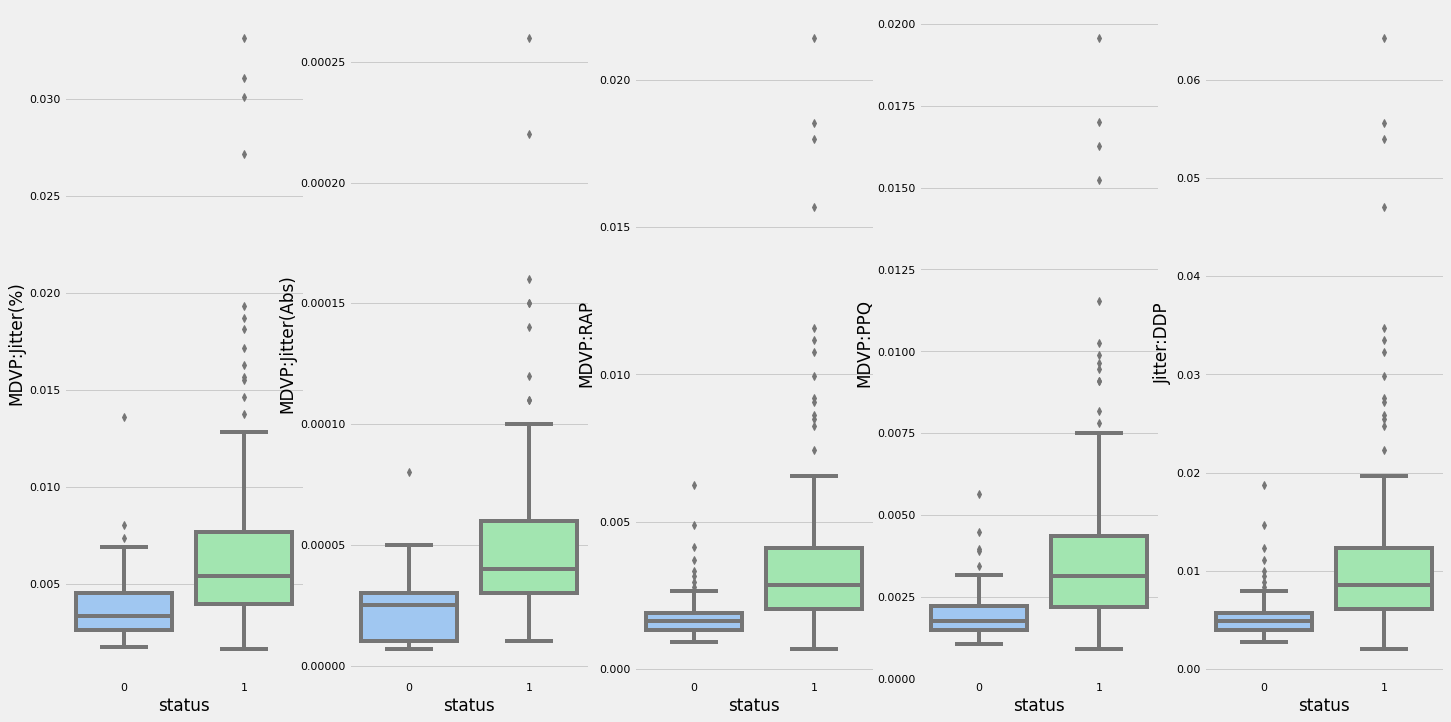

In [15]:
col1 = ["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
plt.style.use('seaborn-pastel')
fig, axs = plt.subplots(ncols = 5,figsize=(20,10))
fig.tight_layout()
for i in range(0,len(col1)):
    sns.boxplot(x='status',y=col1[i],data=pd_df, ax = axs[i])

## Inferences:-
### 1.People having PD have higher values in measures of variation in fundamental frequency compared to normal people.
### 2.All measures of variation in fundamental frequency for normal and people with PD has outliers but people with PD have more number of outliers comparatively.

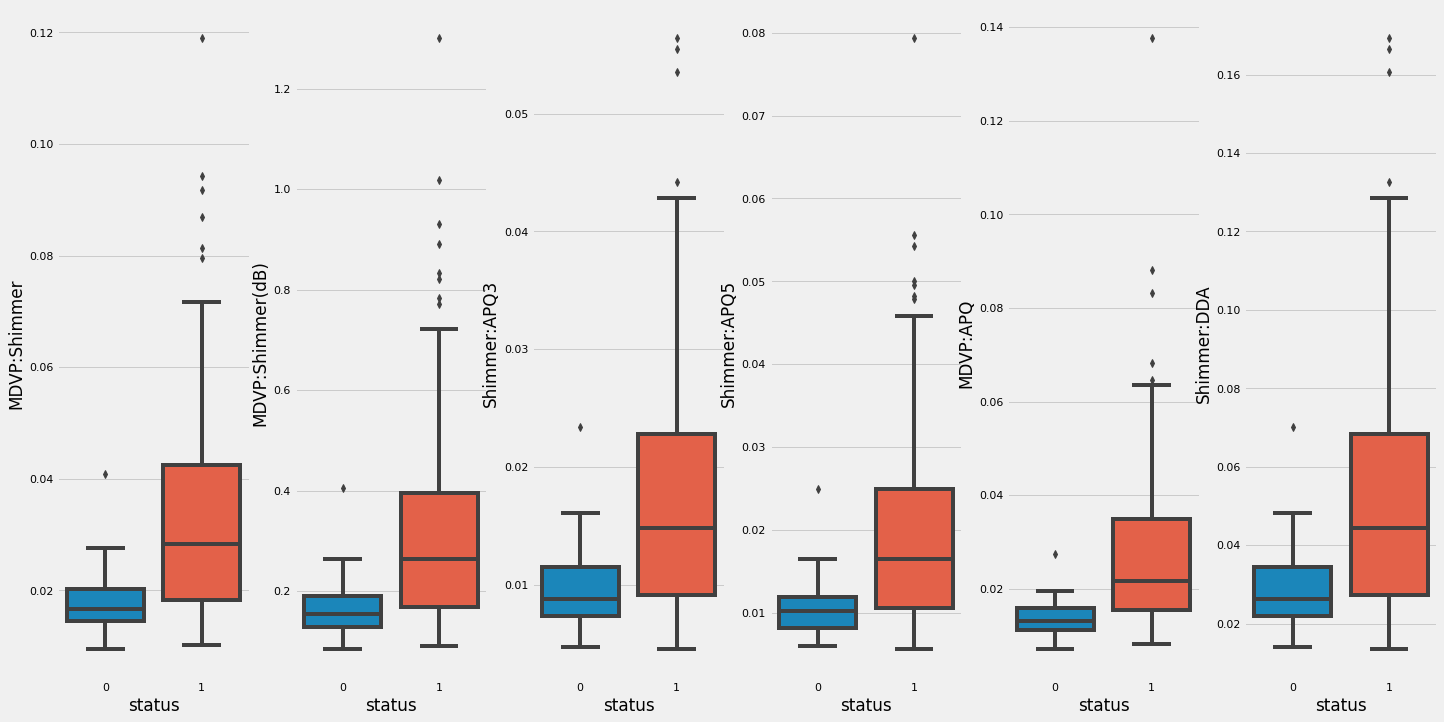

In [16]:
col2 = ["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA"]
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(ncols = 6,figsize=(20,10))
fig.tight_layout()
for i in range(0,len(col2)):
    sns.boxplot(x='status',y=col2[i],data=pd_df, ax = axs[i])

## Inferences:-
### 1.People having PD have higher values in measures of variation in amplitude compared to normal people.
### 2.All measures of variation in amplitude for normal and people with PD has outliers but people with PD have more number of outliers comparatively.

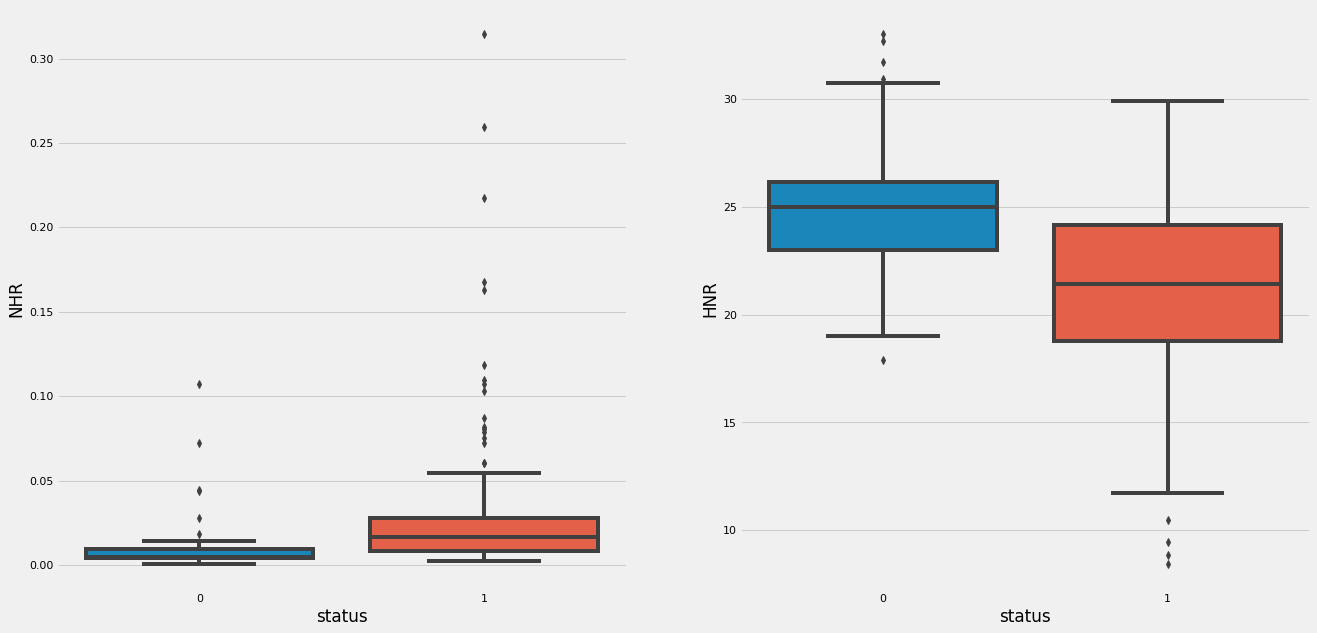

In [17]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x='status',y='NHR',data=pd_df,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=pd_df,ax=ax[1])

### Inference:- People having PD have higher NHR while HNR is lower comparatively.

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [18]:
# dropping name column as this column is not significant for modelling
pd_df = pd_df.drop('name',axis=1)
pd_df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [19]:
X = pd_df.drop("status",axis=1)
y = pd_df["status"]

In [20]:
#importing train_test_split from sklearn and spliting in 70:30 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("X_train: {}".format(len(X_train)))
print("X_test:  {}".format(len(X_test)))

X_train: 136
X_test:  59


# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=3,max_depth=3)
dt_model=dt.fit(X_train,Y_train)

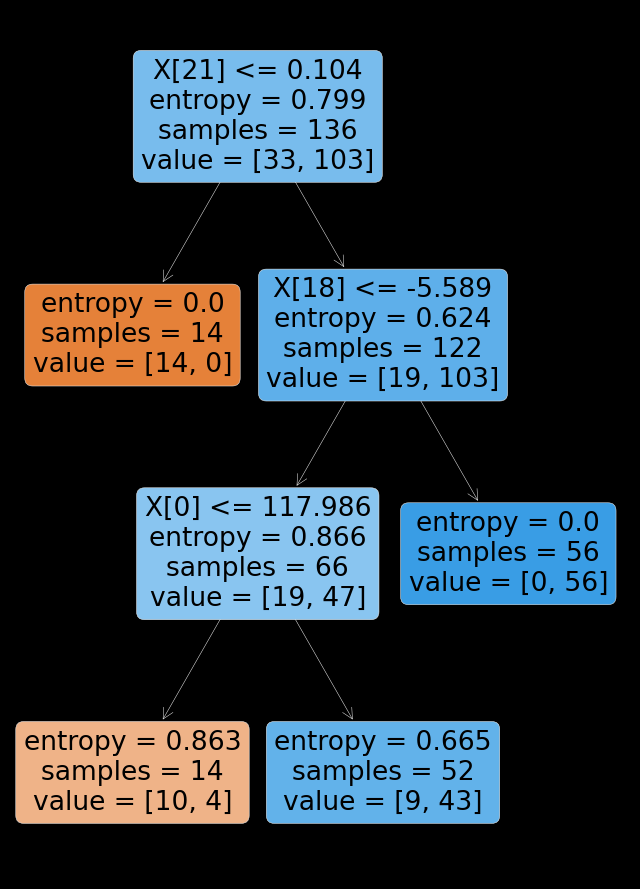

In [22]:
from sklearn.tree import plot_tree
plt.subplots(figsize=(10,15),facecolor='k')
plot_tree(dt_model, filled=True ,rounded=True)
plt.show()

# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [23]:
pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score of training set: {}".format(accuracy_score(Y_train,dt.predict(X_train)))) 

Accuracy Score of training set: 0.9044117647058824


In [24]:
print("Accuracy Score of testing set: {}".format(accuracy_score(Y_test,pred)))

Accuracy Score of testing set: 0.847457627118644


In [25]:
print(confusion_matrix(Y_test,pred))

[[ 9  6]
 [ 3 41]]


In [26]:
pd.crosstab(Y_test.values, pred, rownames=['Actual'], colnames=['Predicted'],margins=True).style.background_gradient(cmap='Set2')

Predicted,0,1,All
Actual,,,
0,9,6,15
1,3,41,44
All,12,47,59


In [27]:
#Identifying no. of misclassification
count_mc = (Y_test.values != pred).sum()
print('Misclassified samples: {}'.format(count_mc))

Misclassified samples: 9


In [28]:
pd.DataFrame({'Columns':X.columns[:],'Imp_Features':dt_model.feature_importances_}).sort_values(by='Imp_Features',ascending=False)

,Columns,Imp_Features
21,PPE,0.525041
18,spread1,0.305708
0,MDVP:Fo(Hz),0.169251
3,MDVP:Jitter(%),0.000000
13,Shimmer:DDA,0.000000
20,D2,0.000000
19,spread2,0.000000
2,MDVP:Flo(Hz),0.000000
17,DFA,0.000000
16,RPDE,0.000000


# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.What is the impact on the model accuracy? How does regularization help? (20 points)

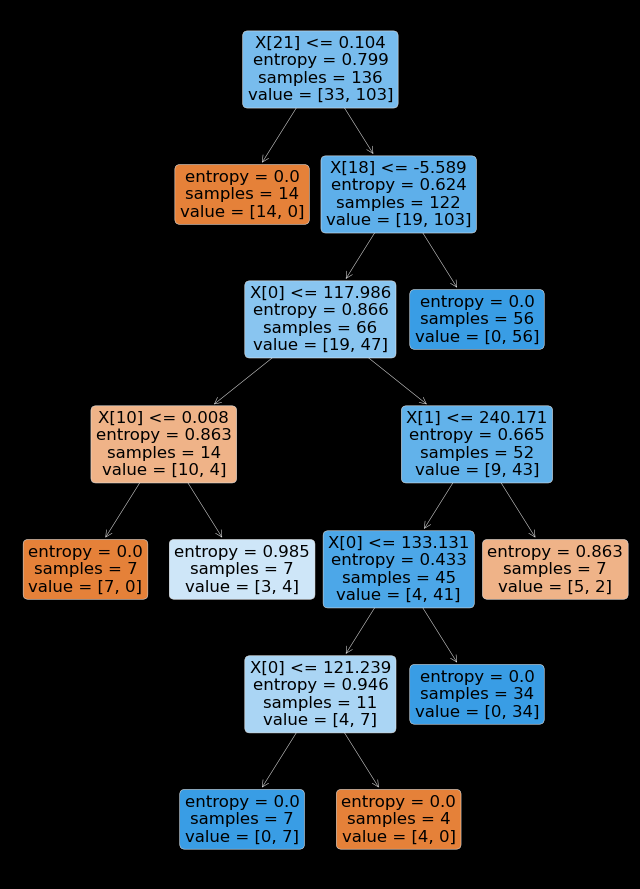

Accuracy Score of training set: 0.9632352941176471
Accuracy Score of testing set: 0.8983050847457628


Predicted,0,1,All
Actual,,,
0,11,4,15
1,2,42,44
All,13,46,59


In [29]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=3,max_depth=6,min_samples_leaf=4)
dt_model=dt.fit(X_train,Y_train)
pred = dt.predict(X_test)
plt.subplots(figsize=(10,15),facecolor='k')
plot_tree(dt_model, filled=True ,rounded=True)
plt.show()
print("Accuracy Score of training set: {}".format(accuracy_score(Y_train,dt.predict(X_train))))
print("Accuracy Score of testing set: {}".format(accuracy_score(Y_test,pred)))
pd.crosstab(Y_test.values, pred, rownames=['Actual'], colnames=['Predicted'],margins=True).style.background_gradient(cmap='Set3')

In [30]:
#Identifying no. of misclassification
count_mc = (Y_test.values != pred).sum()
print('Misclassified samples: {}'.format(count_mc))

Misclassified samples: 6


In [31]:
pd.DataFrame({'Columns':X.columns[:],'Imp_Features':dt_model.feature_importances_}).sort_values(by='Imp_Features',ascending=False)

,Columns,Imp_Features
21,PPE,0.340258
0,MDVP:Fo(Hz),0.312999
18,spread1,0.198117
1,MDVP:Fhi(Hz),0.094470
10,Shimmer:APQ3,0.054155
2,MDVP:Flo(Hz),0.000000
13,Shimmer:DDA,0.000000
20,D2,0.000000
19,spread2,0.000000
17,DFA,0.000000


## Inferences:-
### 1. Model accuracy has improved.
### 2. Regularization helps by decreasing the error rate.
### 3. By regularization more features were used.

# 8. Next implement the decision tree using Random Forest and find the accuracy (10 points).

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,Y_train)
r_pred=rf.predict(X_test)
print("Accuracy Score of testing set: {}".format(accuracy_score(Y_test,r_pred)))

Accuracy Score of testing set: 0.9491525423728814


In [37]:
print("Accuracy Score of training set: {}".format(accuracy_score(Y_train,dt.predict(X_train))))

Accuracy Score of training set: 0.9632352941176471


In [38]:
#Identifying no. of misclassification
count_mc = (Y_test.values != r_pred).sum()
print('Misclassified samples: {}'.format(count_mc))

Misclassified samples: 3


In [39]:
pd.DataFrame({'Columns':X.columns[:],'Imp_Features':rf.feature_importances_}).sort_values(by='Imp_Features',ascending=False)

,Columns,Imp_Features
21,PPE,0.164174
0,MDVP:Fo(Hz),0.132195
2,MDVP:Flo(Hz),0.087027
18,spread1,0.082835
1,MDVP:Fhi(Hz),0.064921
14,NHR,0.046420
19,spread2,0.044183
11,Shimmer:APQ5,0.036534
20,D2,0.034179
4,MDVP:Jitter(Abs),0.032441


### Inferences:-  Model accuracy has increased drastically, minimal error in classification and all features are being used as predictors.